## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [142]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [143]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [144]:
dataset = get_data(data_path='motorbike_ambulance_calls.csv')
dataset

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,spring,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/12,spring,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/12,spring,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/12,spring,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [145]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
index,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


In [146]:
dataset.min()

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

In [147]:
dataset.max()

index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [148]:
dataset.shape

(17379, 15)

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [149]:
dataset.count()

index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64

In [150]:
dataset.dtypes

index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [151]:
dataset.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1. Ми вивантажили датасет та побачили що його розмір 17379 рядків та 15 стовпцівюТакож можна побачити що у нас є дані за два роки 
2. У даному датасеті зустрічаються числові дані, які представлені у вигляді цілих чисел та десяткових чисел, що відображають температуру, вологість, швидкість вітру та інші показники. Також присутні категоріальні дані, представлені у вигляді об'єктів, такі як дата, сезон 
3. В датасеті немає пропущених даних, що є добре для подальшого аналізу.

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [152]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
data = tranform_date(dataset, 'date')
data


,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,spring,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,2012-12-31,spring,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,2012-12-31,spring,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,2012-12-31,spring,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [153]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")
get_time_limits(dataset,'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


За даним аналізом можна побачити, що в датасеті присутні дані за два роки. Також  відсутні дані за 31 грудня, що може викликати певні питання щодо повноти даних на останній день року. 

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [154]:
data_categorical = dataset.loc[:,['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']]
data_categorical

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1
...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,0,1,1,2
17375,spring,1,12,20,0,1,1,2
17376,spring,1,12,21,0,1,1,1
17377,spring,1,12,22,0,1,1,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [155]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].replace({"winter":0,'spring':1,'summer':2,"automn":3})
  return df
dataset = encode_season(dataset, 'season')
dataset['season'] = dataset['mnth'].apply(lambda x: 1 if 3 <= x <= 5 else (2 if 6 <= x <= 8 else (3 if 9 <= x <= 11 else 0)))
dataset.sample(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
14201,14202,2012-08-19,2,1,8,22,0,0,0,2,0.62,0.5909,0.78,0.1642,56
13287,13288,2012-07-12,2,1,7,20,0,4,1,1,0.74,0.6667,0.48,0.2239,514
15998,15999,2012-11-04,3,1,11,7,0,0,0,1,0.26,0.2727,0.65,0.1045,50
1749,1750,2011-03-18,1,0,3,14,0,5,1,1,0.66,0.6212,0.39,0.2537,174
1206,1207,2011-02-23,0,0,2,8,0,3,1,1,0.14,0.1515,0.54,0.1642,235
10343,10344,2012-03-12,1,1,3,2,0,1,1,1,0.38,0.3939,0.54,0.1045,9
11004,11005,2012-04-08,1,1,4,16,0,0,0,1,0.64,0.6061,0.19,0.3284,476
5639,5640,2011-08-28,2,0,8,10,0,0,0,1,0.70,0.6515,0.61,0.6119,142
16680,16681,2012-12-02,0,1,12,19,0,0,0,2,0.40,0.4091,0.82,0.1940,174
15216,15217,2012-10-01,3,1,10,5,0,1,1,1,0.44,0.4394,0.77,0.0000,36


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

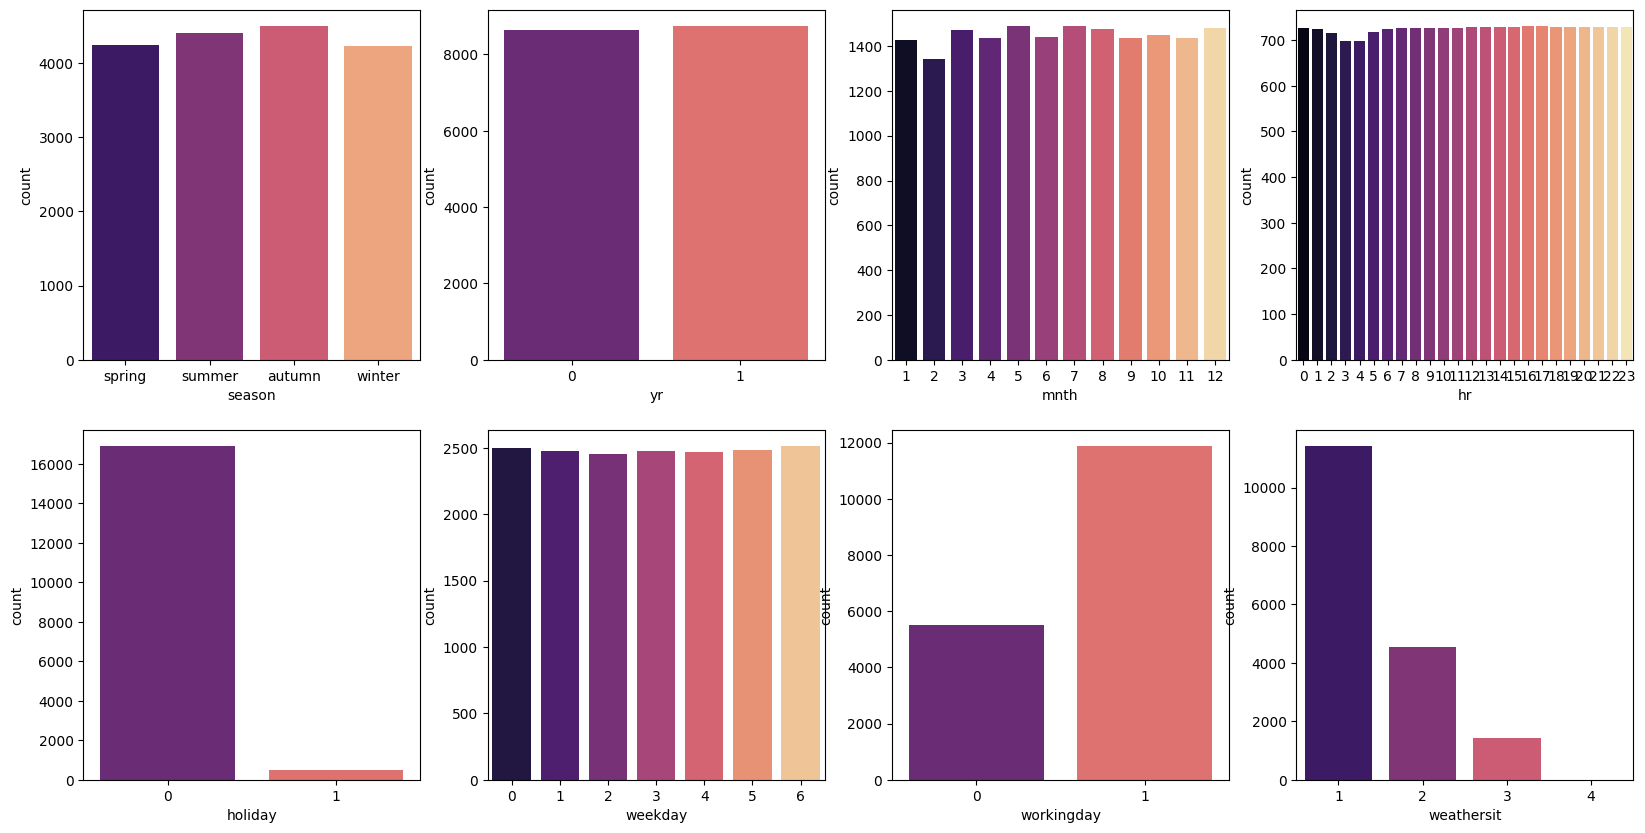

In [156]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(data_categorical,x=variable, ax=subplot, palette='magma')

**Висновки з 5-7 завдання (детальні)**



1. Виділили категоріальні змінні в окремий датасет і помітили, що атрибут "season" потрібно перевести в числовий тип даних.Також помітили помилку в цьому атрибуті, оскільки при першому місяці року показується, що це весна. 
2. Перетворили атрибут "season" в числовий тип де: "winter":0,'spring':1,'summer':2,"automn":3
3. По графікам не можна зробити чіткого висновку, оскільки всі графіки виглядають рівномірними. Проте помітно, що більшість викликів зосереджено на робочі дні та переважно в хорошу погоду.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [157]:
data_numerical = dataset.loc[:,['temp','atemp','hum','windspeed','cnt']]
data_numerical

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0000,16
1,0.22,0.2727,0.80,0.0000,40
2,0.22,0.2727,0.80,0.0000,32
3,0.24,0.2879,0.75,0.0000,13
4,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,119
17375,0.26,0.2576,0.60,0.1642,89
17376,0.26,0.2576,0.60,0.1642,90
17377,0.26,0.2727,0.56,0.1343,61


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

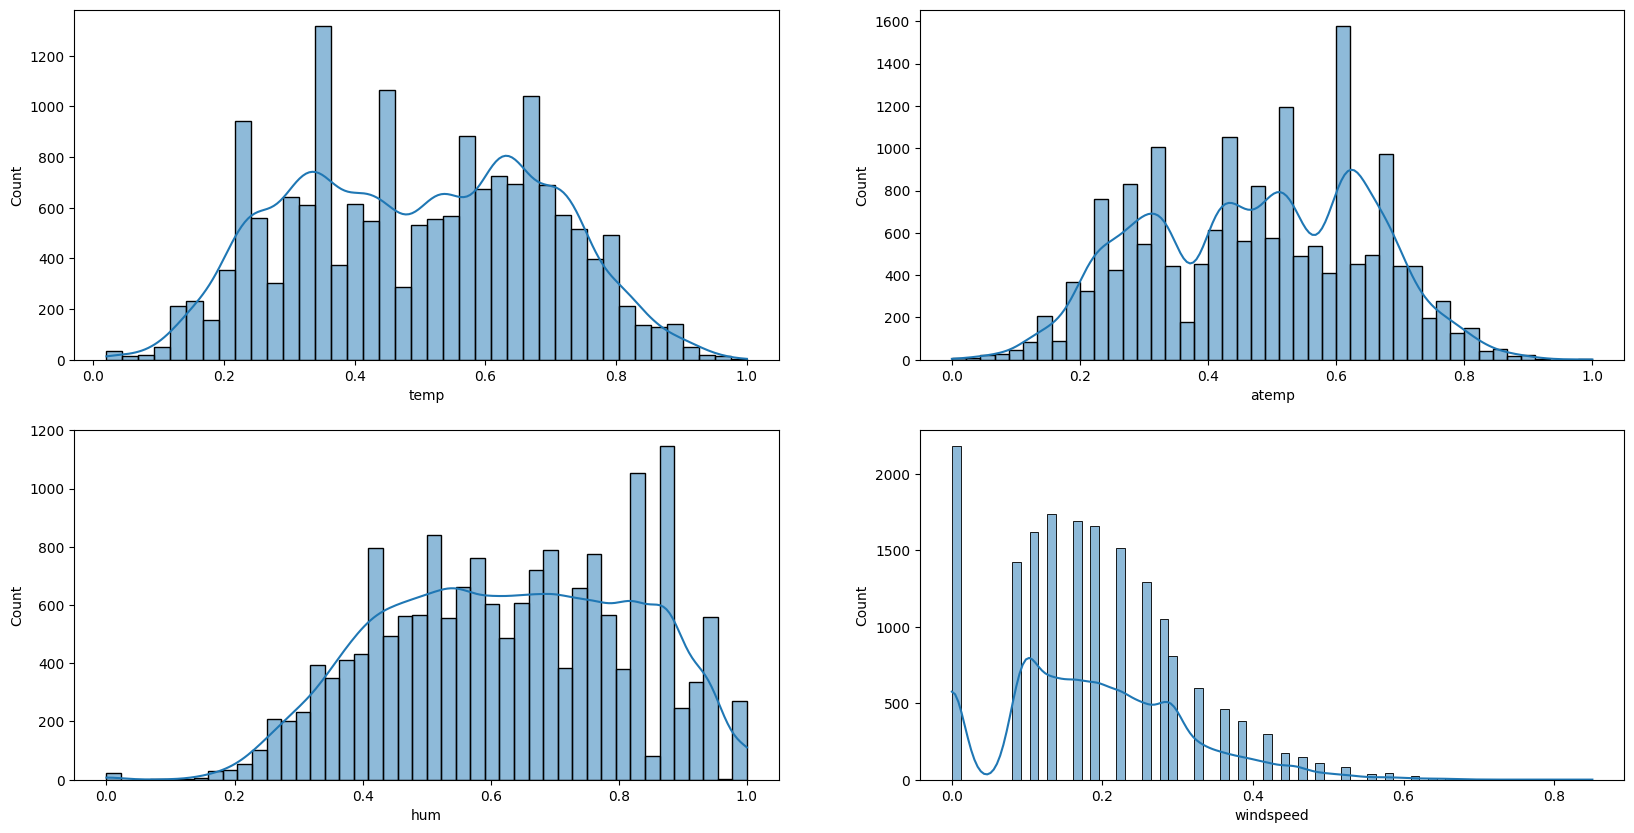

In [177]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(data_numerical,x=variable, ax=subplot, palette='magma',kde=True)

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Коефіцієнт нахилу: 1.2773013463494975


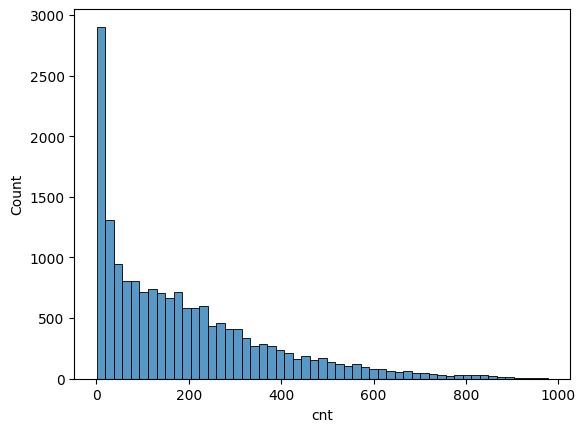

In [178]:
sns.histplot(dataset,x='cnt',palette='magma')
skewness = skew(dataset['cnt'])
print("Коефіцієнт нахилу:", skewness)

**Висновки з 8-10 завдання (детальні)**

1. Виділили числові змінні в окремий датасет: 'temp', 'atemp', 'hum', 'windspeed', 'cnt'. 
2. Намалювали гістограми розподілу та виявили, що 'temp' відображає бімодальний тип розподілу, графік 'atemp' показує мультимодальний розподіл, оскільки чітко виділяються три скачки в даних, графік 'hum' демонструє рівномірний розподіл, оскільки більшість даних зосереджена приблизно в одному діапазоні, та графік 'windspeed' відтворює геометричний розподіл.
3. Цільова змінна 'cnt' також має геометричний розподіл та коефіцієнт нахилу 1.27, що свідчить про праворучну асиметрію розподілу. Крім того, розподіл має великий хвіст, тому можна вважати його важким.

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

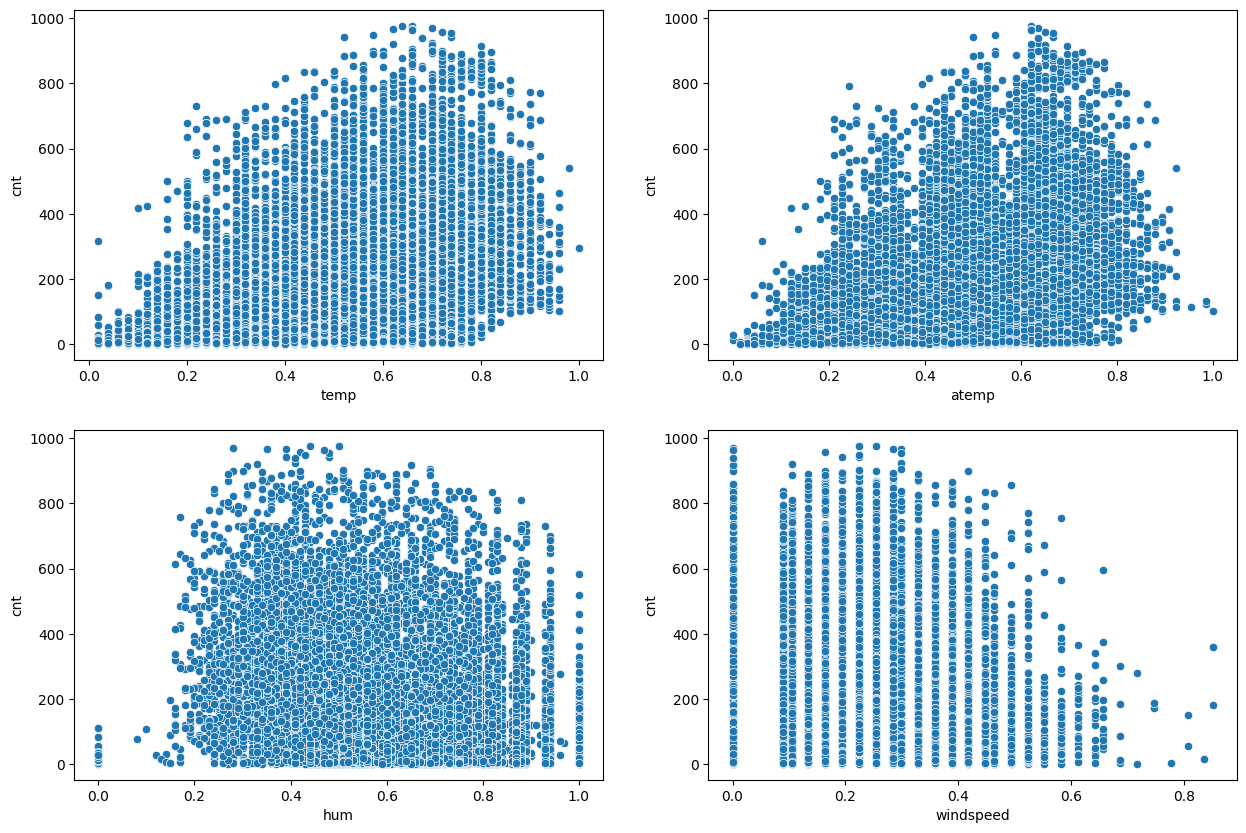

In [160]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(dataset, x=var, y='cnt', ax=subplot, palette='magma')

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

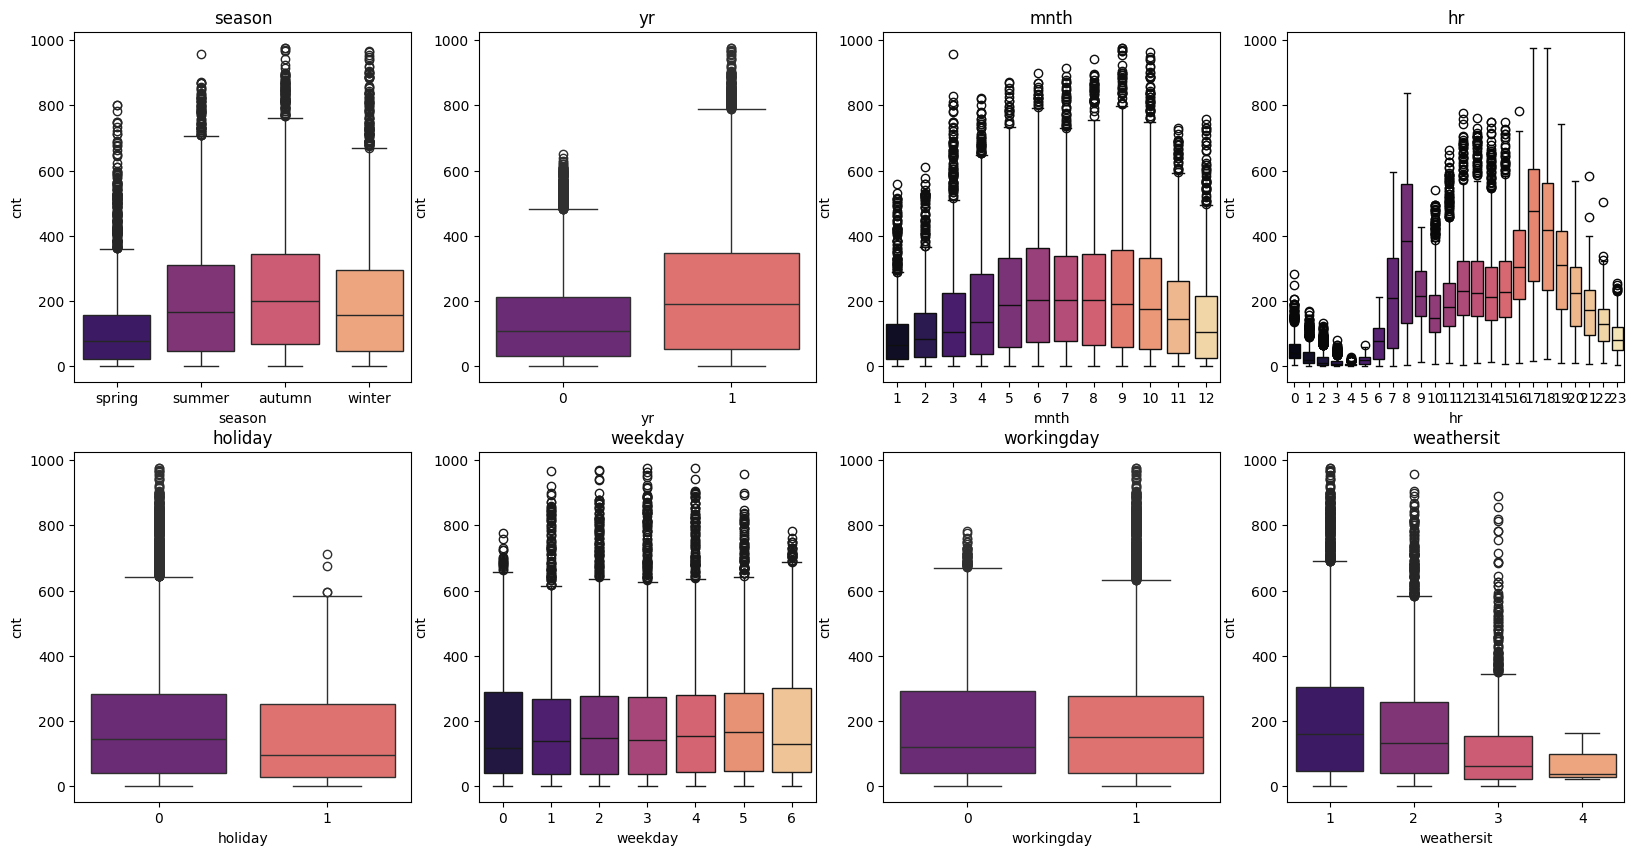

In [179]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
    sns.boxplot(data_categorical,x=var, y=dataset['cnt'],ax=subplot,palette='magma')
    subplot.set_title(var)

**Висновки з 11-12 завдання (детальні)**


1. За графіками 'temp' і 'atemp' можна помітити хороше співвідношення. У випадку з атрибутом 'hum' співвідношення з 'cnt' відсутнє, але є присутня залежність з 'windspeed'.
2. На графіку з 'hr' явно можна помітити, що кількість викликів збільшується в певні години, зокрема з 6 до 9 та з 16 до 19. В цей час більшість людей повертаються та їдуть на роботу. Також, на інших графіках можна помітити велику кількість аномальних значень.

**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

<Axes: >

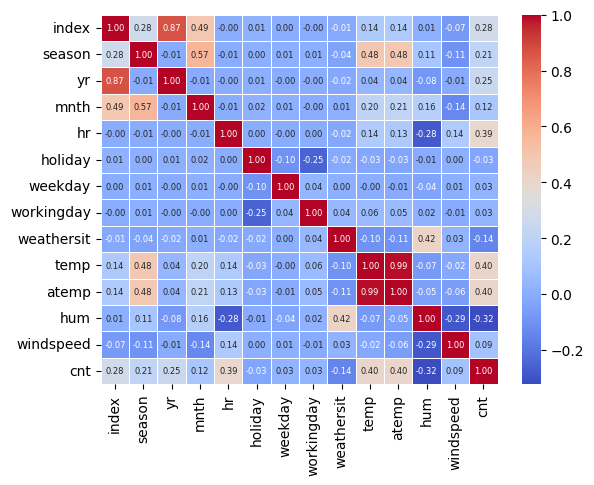

In [162]:
corelation_matrix = dataset.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
sns.heatmap(corelation_matrix, annot=True,cmap='coolwarm',linewidths=0.4, fmt='.02f', annot_kws={"size": 6})

<Axes: >

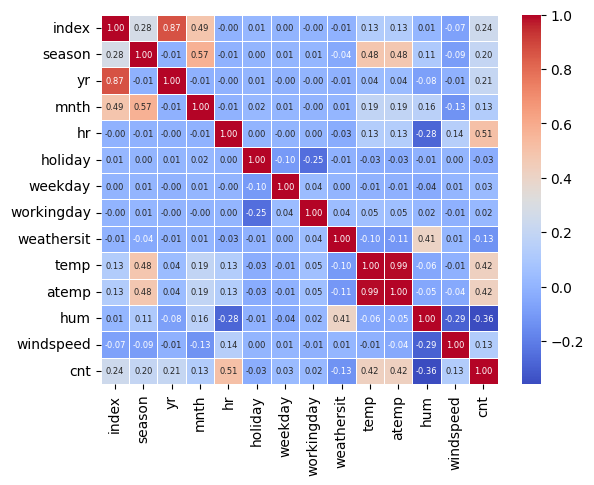

In [163]:
corelation_matrix_spirman = dataset.select_dtypes(include=['float64', 'int64']).corr(method='spearman')
sns.heatmap(corelation_matrix_spirman, annot=True,cmap='coolwarm',linewidths=0.5, fmt='.02f', annot_kws={"size": 6})

На тепловій карті помітна сильна залежність між змінними 'temp' та 'atemp', оскільки вони виглядають майже ідентично. Це дозволяє нам відкинути одну з цих змінних для подальшого аналізу. Також відзначається висока кореляція між змінними 'hr' та 'cnt', що свідчить про залежність кількості викликів від години доби. Крім того, спостерігається залежність між 'cnt' та температурою та вологістю, що підкреслює вплив погодних умов на виклики швидкої. основна відмінність між методами полягає в тому ,що Метод Спірмена може використовуватися навіть у випадку нелінійного зв'язку та виявлення взаємозв'язку в випадку, коли дані не мають нормального розподілу.А метод Пірсона найкраще підходить для оцінки лінійних зв'язків між змінними, якщо вони мають нормальний розподіл.В нашому випадку доцільніше використовувати метод пірсона оськільки у нас немає нормального розподілу

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [165]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      # example:
                      pd.get_dummies(df['season'],prefix='season'),
                      pd.get_dummies(df['yr'],prefix='yr'),
                      pd.get_dummies(df['mnth'],prefix='mnth'),
                      pd.get_dummies(df['hr'],prefix='hr'),
                      pd.get_dummies(df['weekday'],prefix='weekday'),
                      pd.get_dummies(df['workingday'],prefix='workingday'),
                      pd.get_dummies(df['weathersit'],prefix='weathersit'),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [166]:
features = get_dummies(dataset)
features

,index,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0000,...,False,False,False,True,True,False,True,False,False,False
1,2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,True,True,False,True,False,False,False
2,3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,True,True,False,True,False,False,False
3,4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,True,True,False,True,False,False,False
4,5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,19,0,1,0.26,0.2576,0.60,0.1642,...,False,False,False,False,False,True,False,True,False,False
17375,17376,2012-12-31,1,20,0,1,0.26,0.2576,0.60,0.1642,...,False,False,False,False,False,True,False,True,False,False
17376,17377,2012-12-31,1,21,0,1,0.26,0.2576,0.60,0.1642,...,False,False,False,False,False,True,True,False,False,False
17377,17378,2012-12-31,1,22,0,1,0.26,0.2727,0.56,0.1343,...,False,False,False,False,False,True,True,False,False,False


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [167]:
features['night_hours'] = features['hr'].apply(lambda hour: 1 if 23 <= hour >=6 else 0)
features = features.drop('hr', axis = 1)
features

,index,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,night_hours
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0000,16,...,False,False,True,True,False,True,False,False,False,0
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0000,40,...,False,False,True,True,False,True,False,False,False,0
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0000,32,...,False,False,True,True,False,True,False,False,False,0
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0000,13,...,False,False,True,True,False,True,False,False,False,0
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0000,1,...,False,False,True,True,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,119,...,False,False,False,False,True,False,True,False,False,0
17375,17376,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,89,...,False,False,False,False,True,False,True,False,False,0
17376,17377,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,90,...,False,False,False,False,True,True,False,False,False,0
17377,17378,2012-12-31,1,0,1,0.26,0.2727,0.56,0.1343,61,...,False,False,False,False,True,True,False,False,False,0


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [168]:
features_lr = features.drop(['season_0', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [169]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop([target],axis=1)
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [170]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [171]:
features_lr.dtypes

index             int64
yr                int64
holiday           int64
workingday        int64
temp            float64
hum             float64
windspeed       float64
cnt               int64
season_1           bool
season_2           bool
season_3           bool
yr_0               bool
yr_1               bool
mnth_1             bool
mnth_2             bool
mnth_3             bool
mnth_5             bool
mnth_6             bool
mnth_7             bool
mnth_8             bool
mnth_9             bool
mnth_10            bool
mnth_11            bool
mnth_12            bool
hr_1               bool
hr_2               bool
hr_3               bool
hr_4               bool
hr_5               bool
hr_6               bool
hr_7               bool
hr_8               bool
hr_9               bool
hr_10              bool
hr_11              bool
hr_12              bool
hr_13              bool
hr_14              bool
hr_15              bool
hr_16              bool
hr_17              bool
hr_18           

In [172]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [173]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10580.773, test: 10254.299
R^2 train: 0.684, test: 0.675


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

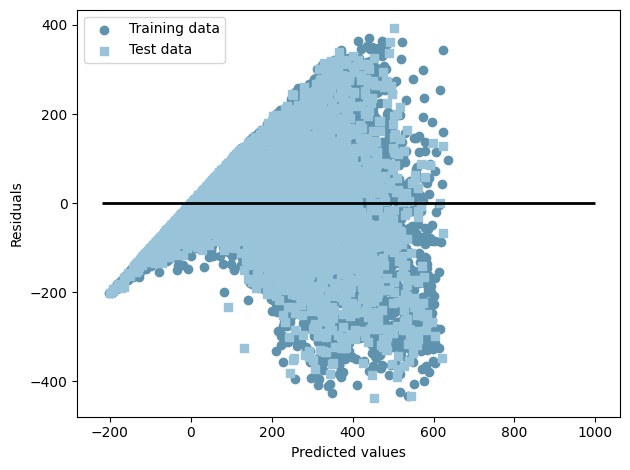

In [174]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**


1. На початку ми зромили фіктивні змінні для тренування моделі та видалили певні атрибути.Потім створили нову зімнну яка показую чи уце нічний чи денний час. 
2. Після отримання фіктивних змінних видалила по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp`.`date` ми видалємо оскільки ці дані уже не релевантні та `atemp` щоб позбутись мультиколінеарності.
3. Після тренування моделі за пропорціями 70/30 ми отримали результати точності на рівні 68.4% для тренувальних даних та 67.5% для тестових даних. Це можна вважати досить непоганим результатом. Проте, на графіку помітно значну кількість викидів, що може вплинути на якість передбачення моделі. Модель здатна правильно передбачити більшу половину даних, але все ж не досягає ідеальної точності, яку б ми хотіли.